In [1]:
!pip install textblob

In [2]:
!pip uninstall nltk -y

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1


In [3]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# For sentiment analysis
from textblob import TextBlob
# Download sentence tokenizer data
nltk.download('punkt') 
# Download nltk stopwords
nltk.download('stopwords') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load the dataset
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [6]:
#EDA
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [7]:
df.shape

(2000, 2)

In [8]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [9]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [10]:
# Define text cleaning function (simplified, avoiding NLTK tokenizers)
def clean_text(text):
    # Lowercase
    text = str(text).lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text) 
    # Remove numbers
    text = re.sub(r'\d+', '', text) 
    # Simple whitespace tokenization
    tokens = text.split()                
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    clean = ' '.join(tokens)
    return clean

In [11]:
df['Cleaned_Data'] = df['Data'].apply(clean_text)
#Sample cleaned text:
print(df['Cleaned_Data'].head())

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: Cleaned_Data, dtype: object


In [12]:
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

In [13]:
#Feature shape:
X.shape

(2000, 3000)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
#Sentiment distribution:
df['Sentiment'] = df['Data'].apply(get_sentiment)
df['Sentiment'].value_counts()

Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64

In [19]:
#Sentiment by category:
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'])
sentiment_by_category

Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42,1,57
comp.graphics,13,4,83
comp.os.ms-windows.misc,24,2,74
comp.sys.ibm.pc.hardware,21,0,79
comp.sys.mac.hardware,24,3,73
comp.windows.x,20,2,78
misc.forsale,7,8,85
rec.autos,27,1,72
rec.motorcycles,30,2,68


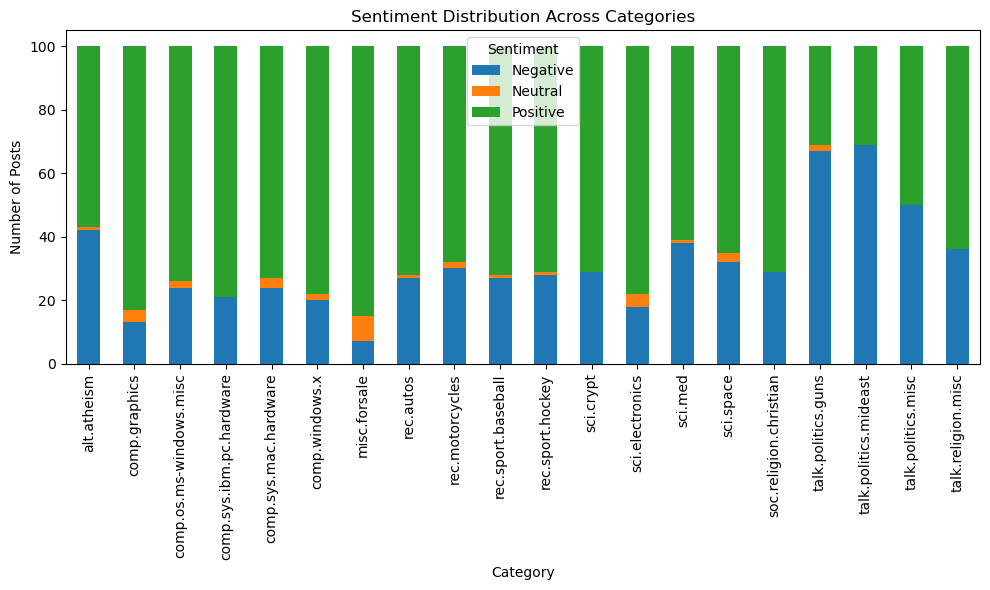

In [20]:
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [21]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [22]:
print(f"\nAccuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-score: 0.84


In [23]:
#Classification Report:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.70      0.76        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.62      0.75      0.68        20
   comp.sys.mac.hardware       0.94      0.80      0.86        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.90      0.90      0.90        20
               rec.autos       0.82      0.90      0.86        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      1.00      0.98        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.83      0.75      0.79        20
                 sci.med       0.94      0.80      0.86        20
         

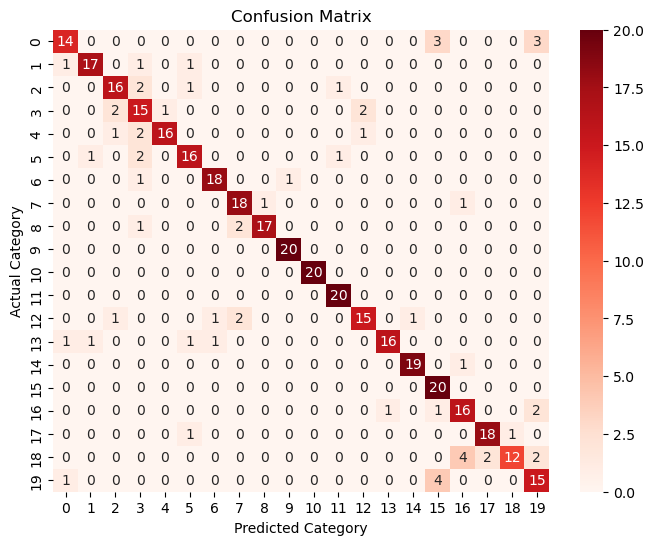

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

In [25]:
#Conclusion:
#The Naive Bayes text classification and sentiment analysis workflow on blog data provides an effective way to automatically
#categorize blog posts and understand their overall sentiment (positive, negative, or neutral). 
#The process involves data cleaning, feature extraction, model training, and evaluation, resulting in accurate category predictions 
#and meaningful insight into the emotional tone of the blogs. These techniques help efficiently organize large volumes of text and 
#reveal key trends or public opinions reflected in blog content.

In [26]:
##########Thanks you  ######